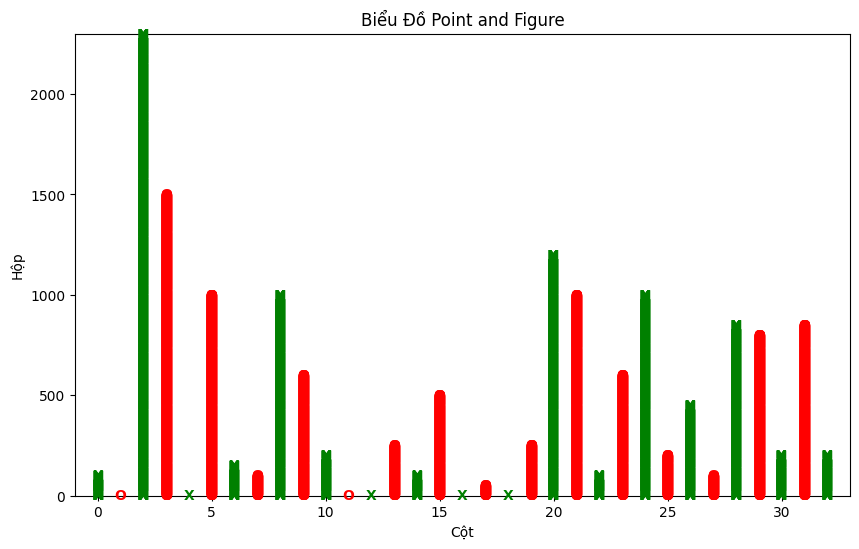

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_pnf(data, box_size, reversal_size):
    current_column = []
    current_direction = 'X'
    current_price = data.iloc[0]['Close']
    pnf_data = []

    for index, row in data.iterrows():
        price_move = row['Close'] - current_price

        if current_direction == 'X':
            if price_move >= box_size:
                num_boxes = int(price_move / box_size)
                current_column.extend(['X'] * num_boxes)
                current_price += num_boxes * box_size
            elif -price_move >= box_size * reversal_size:
                pnf_data.append(current_column)
                current_column = ['O']
                current_direction = 'O'
                current_price -= box_size
        else:
            if -price_move >= box_size:
                num_boxes = int(-price_move / box_size)
                current_column.extend(['O'] * num_boxes)
                current_price -= num_boxes * box_size
            elif price_move >= box_size * reversal_size:
                pnf_data.append(current_column)
                current_column = ['X']
                current_direction = 'X'
                current_price += box_size

    pnf_data.append(current_column)
    return pnf_data

def plot_pnf(pnf_data):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.invert_yaxis()

    for col_index, column in enumerate(pnf_data):
        for row_index, cell in enumerate(column):
            ax.text(col_index, row_index, cell, va='center', ha='center', color='green' if cell == 'X' else 'red', fontweight='bold')

    ax.set_xlim(-1, len(pnf_data))
    ax.set_ylim(-1, len(max(pnf_data, key=len)))
    ax.set_title("Biểu Đồ Point and Figure")
    ax.set_xlabel("Cột")
    ax.set_ylabel("Hộp")
    plt.show()

# Ví dụ sử dụng
data = pd.read_csv(r'G:\My Drive\0. Day ben ngoai (___)\Day Cole\Khoa ML for invesment - Thanhdt (10.2023)\Buổi 10.11. Hoc co giam sat va hoi quy tuyen tinh\data.csv')  # Thay thế 'your_data.csv' bằng đường dẫn file dữ liệu của bạn
pnf_data = calculate_pnf(data, box_size=1, reversal_size=3)
plot_pnf(pnf_data)
